# Intro

At the end of this lesson, you will be able to write TensorFlow and Keras code to use one of the best models in computer vision.

# Lesson


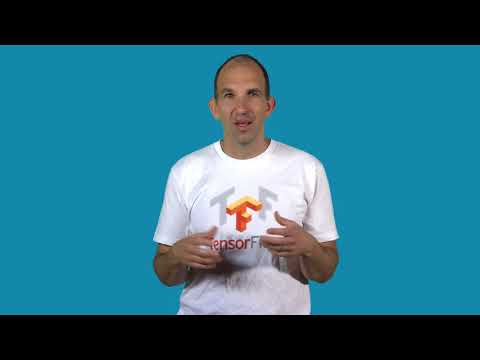

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('sDG5tPtsbSA', width=800, height=450)

# Sample Code

### Choose Images to Work With

In [2]:
from os.path import join

image_dir = '../input/dog-breed-identification/train/'
img_paths = [join(image_dir, filename) for filename in 
                           ['0c8fe33bd89646b678f6b2891df8a1c6.jpg',
                            '0c3b282ecbed1ca9eb17de4cb1b6e326.jpg',
                            '04fb4d719e9fe2b6ffe32d9ae7be8a22.jpg',
                            '0e79be614f12deb4f7cae18614b7391b.jpg']]

### Function to Read and Prep Images for Modeling

In [12]:
import numpy as np
# import tensorflow.python.keras.applications.resnet50
from tensorflow.python.keras.applications.resnet import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

### Create Model with Pre-Trained Weights File. Make Predictions

In [13]:
from tensorflow.python.keras.applications.resnet import ResNet50

my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

ValueError: Shapes (1, 1, 256, 512) and (512, 128, 1, 1) are incompatible

### Visualize Predictions

In [ ]:
from learntools.deep_learning.decode_predictions import decode_predictions
from IPython.display import Image, display

most_likely_labels = decode_predictions(preds, top=3, class_list_path='../input/resnet50/imagenet_class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

# Exercise
Now you are ready to **[use a powerful TensorFlow model](#$EXERCISE_FORKING_URL$)** yourself.